In [13]:
# Fill in the wandb_id assigned to your demo run!

wandb_id = 'ac0sp6nv'
if wandb_id == 'YOUR_ID':
    raise ValueError('Need to provide wandb_id of demo run!')

In [14]:
%load_ext autoreload
%autoreload 2

import os
import json
import wandb
import pandas as pd
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Helper Functions

def restore_file(wandb_id, filename='wandb-summary.json'):
    files_dir = 'notebooks/restored_files'    
    os.system(f'mkdir -p {files_dir}')

    api = wandb.Api()
    run = api.run(f'semantic_uncertainty/{wandb_id}')

    path = f'{files_dir}/{filename}'
    os.system(f'rm -rf {path}')
    run.file(filename).download(root=files_dir, replace=True, exist_ok=False)
    with open(path, 'r') as f:
        out = json.load(f)
    return out

def get_uncertainty_df(metrics):
    data = []
    for method in metrics['uncertainty']:
        for metric in metrics['uncertainty'][method]:
            mean = metrics['uncertainty'][method][metric]['mean']
            data.append([method, metric, mean])
    df = pd.DataFrame(data, columns=['method', 'metric', 'means'])
    main_methods = ['semantic_entropy', 'cluster_assignment_entropy', 'regular_entropy', 'p_false', 'p_ik']
    df = df.set_index('method').loc[main_methods].reset_index()
    main_names = ['Semantic entropy', 'Discrete Semantic Entropy', 'Naive Entropy', 'p(True)', 'Embedding Regression']
    conversion = dict(zip(main_methods, main_names))
    df['method'] = df.method.map(lambda x: conversion[x])
    return df

In [16]:
results = restore_file(wandb_id)
unc_df = get_uncertainty_df(results)
unc_df

,method,metric,means
0,Semantic entropy,accuracy_at_1.0_answer_fraction,0.631579
1,Semantic entropy,AUROC,0.626741
2,Semantic entropy,area_under_thresholded_accuracy,0.682460
3,Semantic entropy,mean_uncertainty,1.534642
4,Semantic entropy,accuracy_at_0.8_answer_fraction,0.652038
5,Semantic entropy,accuracy_at_0.9_answer_fraction,0.640669
6,Semantic entropy,accuracy_at_0.95_answer_fraction,0.635884
7,Discrete Semantic Entropy,accuracy_at_1.0_answer_fraction,0.631579
8,Discrete Semantic Entropy,AUROC,0.629157
9,Discrete Semantic Entropy,area_under_thresholded_accuracy,0.676599


(0.0, 1.0)

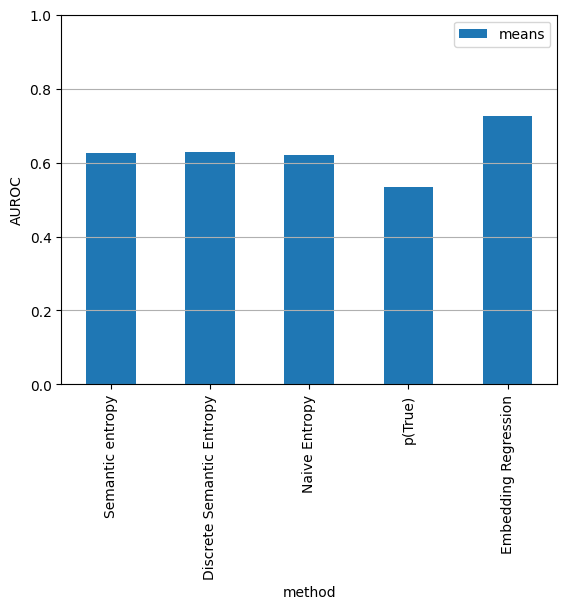

In [17]:
metric = 'AUROC'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.0, 1)